# ACOL test visualisation

## Setup stuff

In [1]:
#imports and settings:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from jupyterthemes import jtplot
from sklearn.cluster import KMeans
from scipy.stats import threshold
import time, os
import _init_paths
import networks.ACOLmnistTrain
jtplot.style()
%matplotlib inline
tf.logging.set_verbosity(tf.logging.INFO)
mnist = input_data.read_data_sets('./MNIST_data', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
clustCount = 5
classCount = 2
net = 0
trainsteps = 50000
trainsteps = 500
modelCheckPointFN = 'VGGnet_fast_rcnn_iter_50000.ckpt'
modelCheckPoint = '/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/'  
device = 'gpu'
device_id = 0

In [3]:
#imdb = get_imdb(args.imdb_name)
#imdb.competition_mode(args.comp_mode)

#save_features = args.save_features

# Find the checkpoint directory, or wait until it exists.
print('Looking for checkpoint at: ',modelCheckPoint)
while True:
    ckpt = tf.train.get_checkpoint_state(modelCheckPoint)
    if ckpt and ckpt.model_checkpoint_path:
        break
    else:
        print('Waiting for checkpoint in directory {} to exist...'.format(modelCheckPoint))
        time.sleep(10)

print(ckpt)
print(ckpt.model_checkpoint_path)

weights_filename = os.path.splitext(os.path.basename(modelCheckPoint))[0]

device_name = '/{}:{:d}'.format(device,device_id)
print device_name

network = networks.ACOLmnistTrain()

#if device == 'gpu':
#    cfg.USE_GPU_NMS = True
#    cfg.GPU_ID = device_id
#else:
#    cfg.USE_GPU_NMS = False

# start a session
saver = tf.train.Saver()
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
saver.restore(sess, modelCheckPoint+modelCheckPointFN)
print ('Loading model weights from {:s}').format(modelCheckPoint)

('Looking for checkpoint at: ', '/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/')
model_checkpoint_path: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_50000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_5000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_10000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_15000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_20000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_25000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000/output/default/mnist/VGGnet_fast_rcnn_iter_30000.ckpt"
all_model_checkpoint_paths: "/code/ThesisProject-SCFasterRCNN9000

NotFoundError: Key clustering_1/biases not found in checkpoint
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]
	 [[Node: save/RestoreV2_2/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_33_save/RestoreV2_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op u'save/RestoreV2_2', defined at:
  File "/opt/conda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/conda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/opt/conda/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-77231a06d128>", line 33, in <module>
    saver = tf.train.Saver()
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1040, in __init__
    self.build()
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1070, in build
    restore_sequentially=self._restore_sequentially)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 675, in build
    restore_sequentially, reshape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 402, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 242, in restore_op
    [spec.tensor.dtype])[0])
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 668, in restore_v2
    dtypes=dtypes, name=name)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key clustering_1/biases not found in checkpoint
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]
	 [[Node: save/RestoreV2_2/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_33_save/RestoreV2_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


## Test network

In [4]:
y = {0:[0,1], 1:[1,0]}

batchSize = 128

## Testing & visualising

In [8]:
testSize = 1000
testbatch = mnist.test.next_batch(testSize)
testbatch = (testbatch[0],np.array([y[np.argmax(testbatch[1][j])>4] for j in range(len(testbatch[1]))]))

y_conv = network.get_output('smStacked').eval({network.data: testbatch[0], network.y_: testbatch[1]},session=sess)
#y_conv = sess.run(['smStacked'],{network.data: testbatch[0], network.y_: testbatch[1]})
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(testbatch[1],1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print accuracy.eval(session=sess)
#print('Test: accuracy: %g'%(test_acc))



FailedPreconditionError: Attempting to use uninitialized value conv1_1/weights
	 [[Node: conv1_1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv1_1/weights)]]
	 [[Node: smStacked/_23 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_82_smStacked", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'conv1_1/weights/read', defined at:
  File "/opt/conda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/conda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/opt/conda/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-77231a06d128>", line 24, in <module>
    network = networks.ACOLmnistTrain()
  File "../lib/networks/ACOLmnistTrain.py", line 22, in __init__
    self.setup()
  File "../lib/networks/ACOLmnistTrain.py", line 37, in setup
    .conv(5, 5, 32, 1, 1, name='conv1_1')
  File "../lib/networks/network.py", line 23, in layer_decorated
    layer_output = op(self, layer_input, *args, **kwargs)
  File "../lib/networks/network.py", line 114, in conv
    kernel = self.make_var('weights', [k_h, k_w, c_i/group, c_o], init_weights, trainable)
  File "../lib/networks/network.py", line 98, in make_var
    return tf.get_variable(name, shape, initializer=initializer, trainable=trainable)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 988, in get_variable
    custom_getter=custom_getter)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 890, in get_variable
    custom_getter=custom_getter)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 348, in get_variable
    validate_shape=validate_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 333, in _true_getter
    caching_device=caching_device, validate_shape=validate_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 684, in _get_single_variable
    validate_shape=validate_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 315, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv1_1/weights
	 [[Node: conv1_1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv1_1/weights)]]
	 [[Node: smStacked/_23 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_82_smStacked", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [6]:
digitTrace = np.zeros((classCount*clustCount,784))
digitTraceCount = np.zeros((classCount*clustCount))
digitCount = np.zeros(10)
softmaxMat = network.get_output('softmaxMat')
softmaxMat.shape

TensorShape([Dimension(None), Dimension(2), Dimension(5)])

In [7]:
tb = mnist.test.next_batch(1)
ypred = softmaxMat.eval({network.data: testbatch[0], network.y_: testbatch[1]},session=sess)

FailedPreconditionError: Attempting to use uninitialized value conv1_1/weights
	 [[Node: conv1_1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv1_1/weights)]]
	 [[Node: softmaxMat/_27 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_79_softmaxMat", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'conv1_1/weights/read', defined at:
  File "/opt/conda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/conda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/opt/conda/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-77231a06d128>", line 24, in <module>
    network = networks.ACOLmnistTrain()
  File "../lib/networks/ACOLmnistTrain.py", line 22, in __init__
    self.setup()
  File "../lib/networks/ACOLmnistTrain.py", line 37, in setup
    .conv(5, 5, 32, 1, 1, name='conv1_1')
  File "../lib/networks/network.py", line 23, in layer_decorated
    layer_output = op(self, layer_input, *args, **kwargs)
  File "../lib/networks/network.py", line 114, in conv
    kernel = self.make_var('weights', [k_h, k_w, c_i/group, c_o], init_weights, trainable)
  File "../lib/networks/network.py", line 98, in make_var
    return tf.get_variable(name, shape, initializer=initializer, trainable=trainable)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 988, in get_variable
    custom_getter=custom_getter)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 890, in get_variable
    custom_getter=custom_getter)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 348, in get_variable
    validate_shape=validate_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 333, in _true_getter
    caching_device=caching_device, validate_shape=validate_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 684, in _get_single_variable
    validate_shape=validate_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 315, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv1_1/weights
	 [[Node: conv1_1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv1_1/weights)]]
	 [[Node: softmaxMat/_27 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_79_softmaxMat", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [7]:
#sess.run(tf.global_variables_initializer())
for i in range(1000):
    tb = mnist.test.next_batch(1)
    digitCount[np.argmax(tb[1])]+=1
    testbatch = (tb[0],np.array([y[np.argmax(tb[1][j])>4] for j in range(len(tb[1]))]))
    smMat, acc = sess.run([softmaxMat,accuracy],feed_dict={network.data: testbatch[0], network.y_: testbatch[1]})
    ypred = softmaxMat.eval({network.data: testbatch[0], network.y_: testbatch[1]},session=sess)
    digitTrace[np.argmax(ypred),:] += testbatch[0].ravel()
    digitTraceCount[np.argmax(ypred)] += 1

In [8]:
print digitCount
print digitTraceCount

[  90.  108.  103.  100.  107.   92.   91.  106.  103.  100.]
[ 130.   80.  150.   69.   55.  104.  108.  110.  106.   88.]


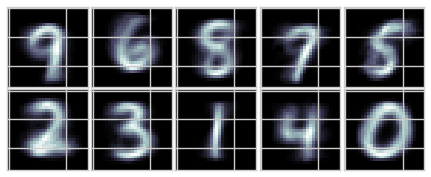

In [9]:
digitTrace = digitTrace/np.max(digitTrace)
f,ax=plt.subplots(nrows=classCount, ncols=clustCount, figsize=(1.5*clustCount,1.5*classCount))
gs = gridspec.GridSpec(classCount,clustCount)
gs.update(wspace=0.025, hspace=0.025)
f.subplots_adjust(wspace=0,hspace=0)
for i in range(digitTrace.shape[0]):
    sp = plt.subplot(gs[i])
    sp.set_xticklabels([])
    sp.set_yticklabels([])
    sp.set_aspect('equal')
    sp.grid = False
    plt.imshow(np.reshape(digitTrace[i,:],(28,28)),cmap='bone')

In [10]:
tb = mnist.test.next_batch(10000)
#tb[0][:,:] = threshold(tb[0][:,:],threshmin=0.5,newval=0)
#tb[0][:,:] = threshold(tb[0][:,:],threshmax=0.49,newval=1)
testbatch = (tb[0],np.array([y[np.argmax(tb[1][j])>4] for j in range(len(tb[1]))]))
testFeed = {network.data: testbatch[0], network.y_: testbatch[1]}
ypred = softmaxMat.eval(testFeed,session=sess)
ypred = ypred.reshape((tb[0].shape[0],clustCount*classCount))
ypred = tf.argmax(ypred,1).eval(session=sess)
ylookup = [np.argmax(np.sum(tb[1][ypred==i],0)).astype('int32') for i in range(clustCount*classCount)]
yconverted = [ylookup[i] for i in ypred]
correct_prediction = tf.equal(yconverted, np.argmax(tb[1],1).astype('int32'))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).eval(session=sess)
print 'Clustering Accuracy: %g'%(accuracy)
print ylookup

Clustering Accuracy: 0.811
[9, 6, 8, 7, 5, 2, 3, 1, 4, 0]
